In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Wczytywanie DataFrame z innego pliku typu "ipynb"

In [15]:
%store -r bit_stock  # Wczytywanie DataFrame

no stored variable or alias #
no stored variable or alias Wczytywanie
no stored variable or alias DataFrame


In [16]:
df = bit_stock.copy()

In [17]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-12,8.01,8.05,8.00,8.01,8.01,1435.0
2011-01-13,7.90,8.25,7.90,8.10,8.10,802.0
2011-01-14,8.00,8.00,7.65,7.95,7.95,2955.0
2011-01-17,7.99,9.50,7.95,9.05,9.05,20156.0
2011-01-18,9.05,9.05,8.31,8.72,8.72,4897.0


In [18]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-04,401.000000,409.399994,399.000000,407.200012,407.200012,5303.0
2021-10-05,408.000000,409.200012,402.600006,405.000000,405.000000,1674.0
2021-10-06,409.000000,409.000000,397.200012,401.000000,401.000000,3322.0
2021-10-07,400.000000,405.000000,395.200012,397.200012,397.200012,3375.0
2021-10-08,400.000000,424.000000,396.000000,423.399994,423.399994,8147.0
2021-10-11,424.000000,428.799988,418.799988,420.600006,420.600006,5215.0
2021-10-12,421.000000,423.799988,412.799988,413.000000,413.000000,7547.0
2021-10-13,418.000000,420.600006,414.600006,419.600006,419.600006,1111.0
2021-10-14,419.399994,427.799988,419.399994,425.000000,425.000000,3236.0


# Wizualizacja - Wsprowadzenie

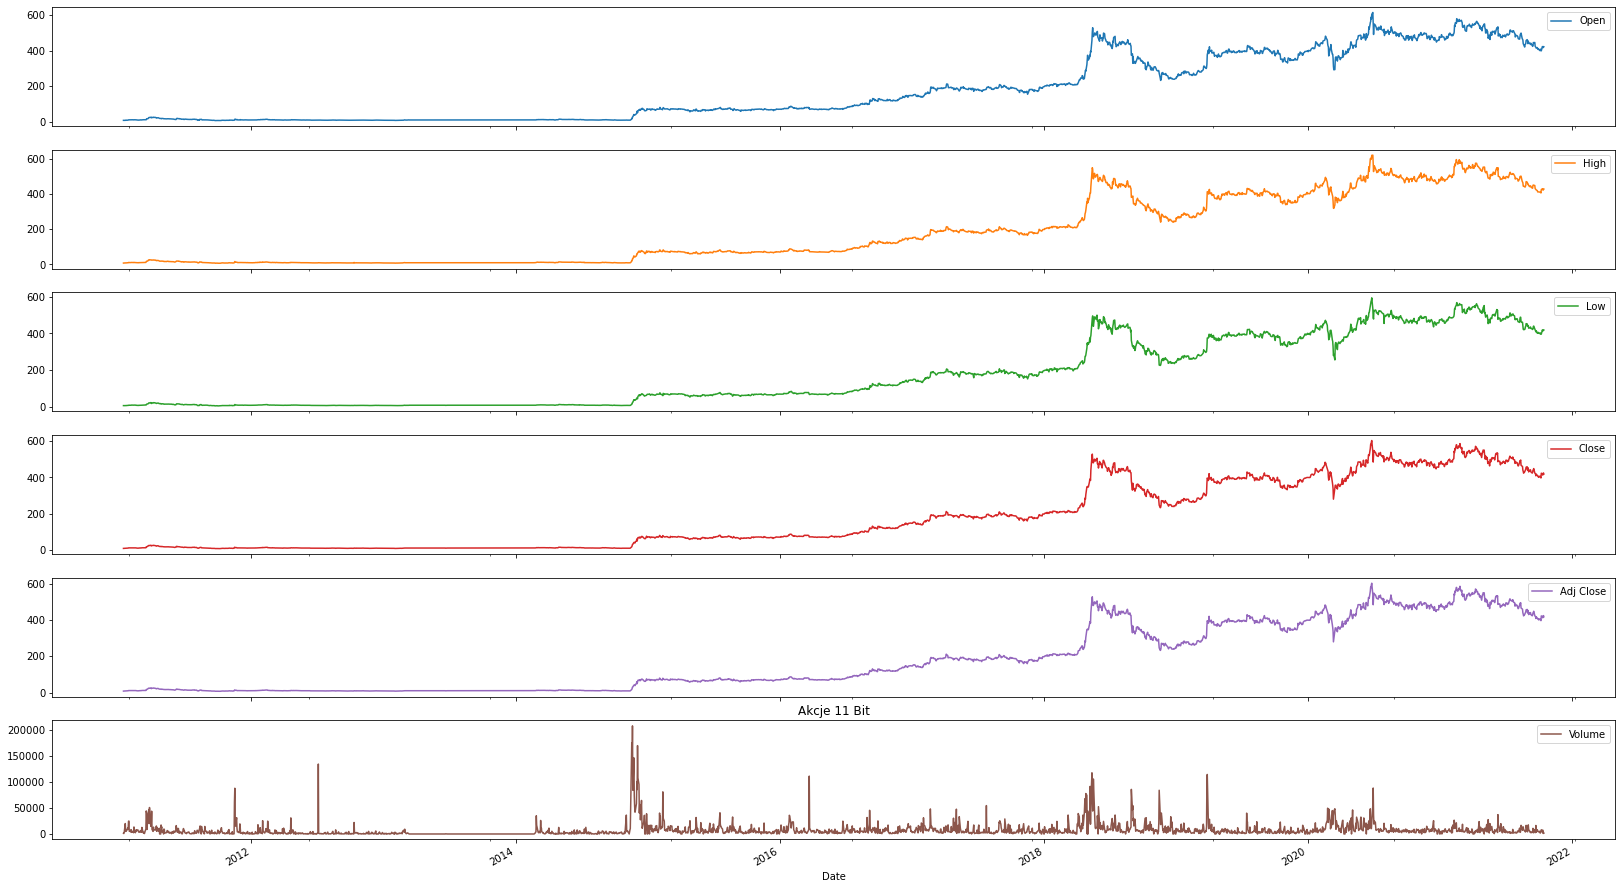

In [19]:
df.plot(subplots=True, figsize=(28,17))

plt.title("Akcje 11 Bit")

plt.show()

#  Przyjrzyjmy się danym z lat 2019-2021

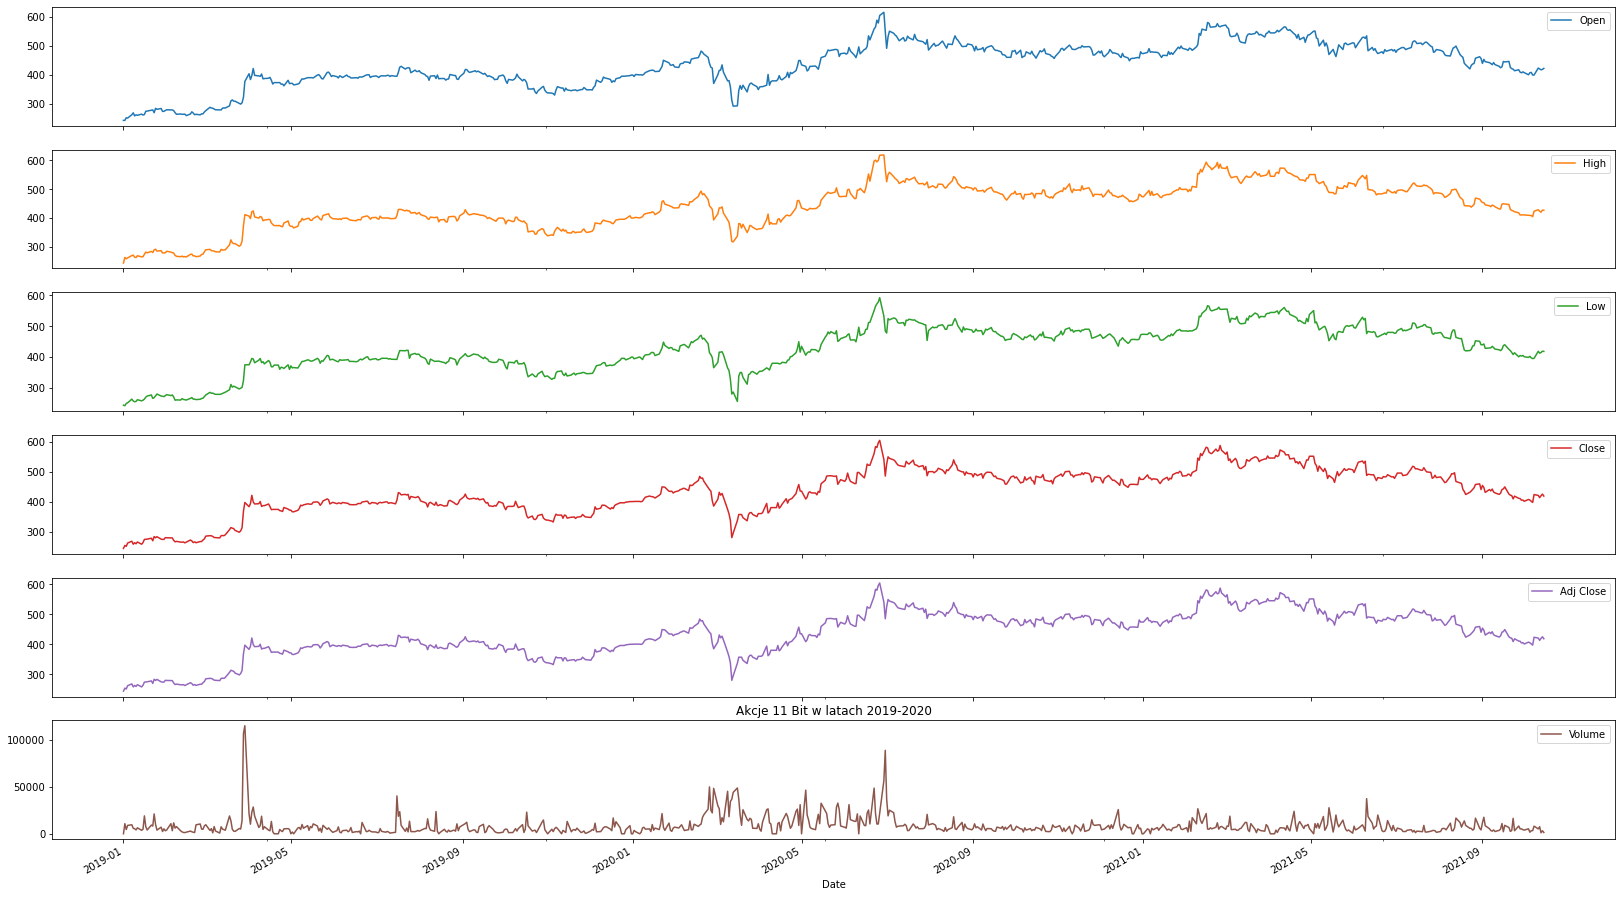

In [20]:
df['2019-01-01':'2021-10-15'].plot(subplots=True, figsize=(28,17))
plt.title('Akcje 11 Bit w latach 2019-2020')
plt.show()

# Wizualizacja ceny "Open" oraz "Close" przez ostatnie 10 dni

<Figure size 2016x1080 with 0 Axes>

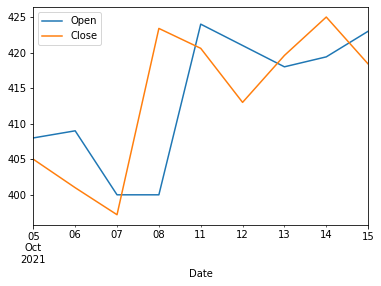

In [21]:
plt.figure(figsize=(28,15))
df.loc["2021-10-05":"2021-10-15"][["Open","Close"]].plot()
plt.show()

# 100 Moving Average 


#### 100-day Moving Average (MA) to średnia cena "Close" w ostatnich stu dniach. Przedstawia cene-trend przez średni okres czasowy.

#### Bierze dzisiejszą (ostatnią cene) cene, która była 99 dni temu i tworzy średnią

#### wartości, które nie mieszczą sie w przedziale od 2021-05-27 do 2021-10-14 będą mieć wartość "NaN" ("Not a number). Dlatego dodajemy parametr "min_periods = 0"

In [22]:
df.iloc[-100:len(df)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-28,505.000000,523.000000,500.000000,509.000000,509.000000,4076.0
2021-05-31,511.000000,519.000000,504.000000,506.000000,506.000000,693.0
2021-06-01,510.000000,519.000000,495.600006,496.799988,496.799988,8073.0
2021-06-02,494.000000,510.000000,494.000000,508.000000,508.000000,4121.0
2021-06-04,509.500000,532.000000,509.500000,531.000000,531.000000,5760.0
...,...,...,...,...,...,...
2021-10-11,424.000000,428.799988,418.799988,420.600006,420.600006,5215.0
2021-10-12,421.000000,423.799988,412.799988,413.000000,413.000000,7547.0
2021-10-13,418.000000,420.600006,414.600006,419.600006,419.600006,1111.0


## Tworzymy kolumne "100ma" 

In [23]:
df["100ma"]  =df["Adj Close"].rolling(window=100, min_periods=0).mean()
df["100ma"]

Date
2011-01-12      8.010000
2011-01-13      8.055000
2011-01-14      8.020000
2011-01-17      8.277500
2011-01-18      8.366000
                 ...    
2021-10-11    467.438001
2021-10-12    466.538001
2021-10-13    465.634001
2021-10-14    464.844001
2021-10-15    463.978001
Name: 100ma, Length: 2792, dtype: float64

## Tworzymy wykresy przedstawiające "Adj Close", "100ma" oraz "Volume" 

### PRZYPOMNIENIE: Adjusted Close to cena Close po korekcie o wszystkie podziałty i aktywa wyplacone właścicielom, które jest wynagrodzeniem za udzielenie kapitału.

In [24]:
plt.figure(figsize=(28,17))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((6,1), (4,0), rowspan=2, colspan=1)

ax1.plot(df.index,df["Adj Close"])
ax1.plot(df.index,df["100ma"])
ax2.bar(df.index,df["Volume"])

<BarContainer object of 2792 artists>

## Tworzymy kolumny MA20 oraz MA50

In [ ]:
df["20ma"] = df['Open'].rolling(window=20, min_periods=0).mean()
df["50ma"] = df['Open'].rolling(window=50, min_periods=0).mean()

<AxesSubplot:xlabel='Date'>

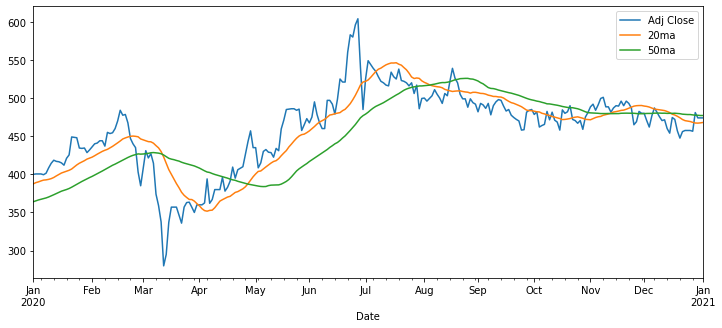

In [ ]:
df.truncate(before='2020-01-01', after='2021-01-01')[['Adj Close','20ma','50ma']].plot(subplots=False,figsize=(12,5))

# 10 Dni w historii z największą dzienną stopą zwrotu dla 11BIT

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()
df_10 = df.sort_values(by=['Daily Return'],ascending=False)

In [ ]:
df_10 = df_10[0:10]
df_10[['Daily Return']]

,Daily Return
Date,
2014-11-17,0.611227
2011-11-15,0.477966
2011-03-16,0.434745
2014-11-20,0.359091
2014-11-24,0.322685
2014-11-19,0.294118
2014-12-02,0.227496
2014-12-29,0.217742
2011-03-21,0.208000


# OHLC Wykres

## Wykres świecowy/open-high-low-close - wykres prezentuje rozmieszczenie open,.high, low oraz close. Na zielono zaznaczono świecę wzrostową. Na czerwonych 'świecach' poziomy open i close znajdują się w przeciwległych końcach świecy.

## Tworzymy specjalny DataFrame, który wykorzystamy w wykresie OHLC ---> df_ohlc

In [ ]:
# resample("10D") "10D" ---> 0-sięć dni
df_ohlc = df["Adj Close"].resample("10D").ohlc()
df_volume = df["Volume"].resample("10D").sum()

df_ohlc.head() # 0-sięcio dniowe dane

,open,high,low,close
Date,,,,
2011-01-12,8.01,9.15,7.95,8.70
2011-01-22,9.38,10.90,9.38,10.45
2011-02-01,10.35,11.40,10.35,11.05
2011-02-11,11.25,11.25,9.80,9.80
2011-02-21,9.31,10.70,9.31,10.63


In [ ]:
df_volume

Date
2011-01-12    49512.0
2011-01-22    81394.0
2011-02-01    45623.0
2011-02-11    35622.0
2011-02-21    41348.0
               ...   
2021-08-27    64562.0
2021-09-06    37991.0
2021-09-16    43657.0
2021-09-26    34037.0
2021-10-06    33393.0
Freq: 10D, Name: Volume, Length: 393, dtype: float64

 dates (in date's format) open high low close

### Zmieniamy dotychczasowy index w columne
### Zmieniamy format kolumny "Date" na format czasowy występujący w OHLC


In [ ]:
df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num) 
df_ohlc

,Date,open,high,low,close
0,14986.0,8.010000,9.150000,7.950000,8.700000
1,14996.0,9.380000,10.900000,9.380000,10.450000
2,15006.0,10.350000,11.400000,10.350000,11.050000
3,15016.0,11.250000,11.250000,9.800000,9.800000
4,15026.0,9.310000,10.700000,9.310000,10.630000
...,...,...,...,...,...
388,18866.0,457.000000,459.000000,430.600006,430.600006
389,18876.0,440.000000,441.799988,424.000000,440.200012
390,18886.0,442.200012,449.000000,409.000000,418.200012
391,18896.0,410.799988,410.799988,401.000000,405.000000


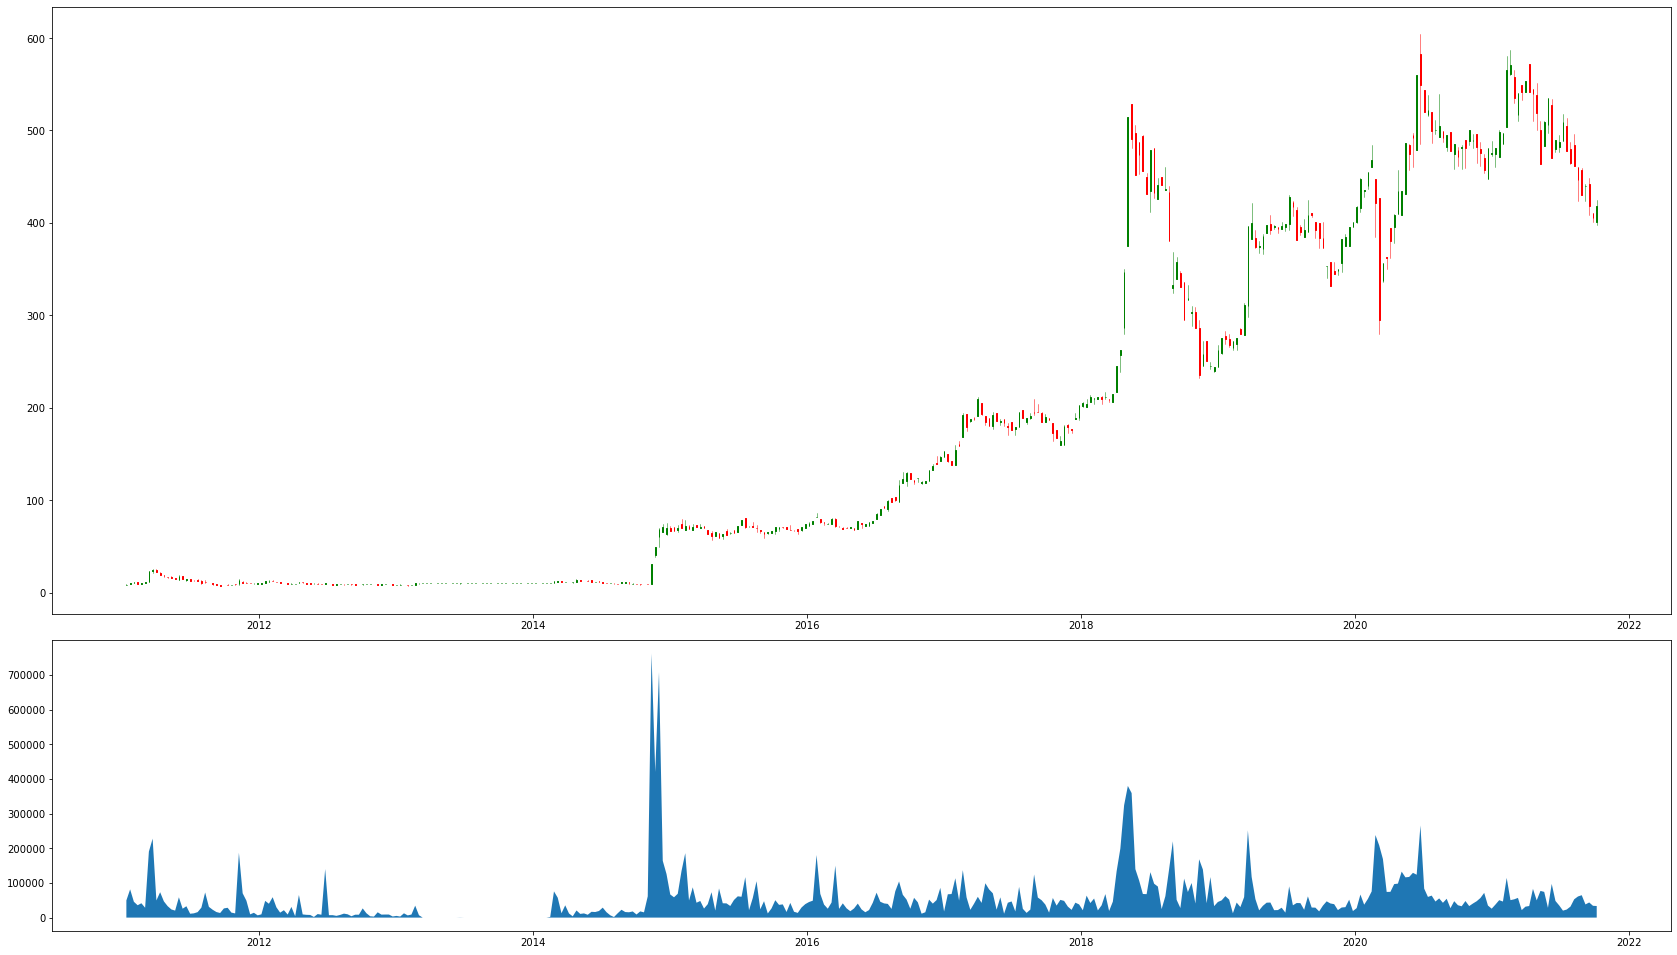

In [ ]:
plt.figure(figsize=(29,17))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((6,1), (4,0), rowspan=2, colspan=1, sharex = ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width = 2, colorup="g")
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

